In [771]:
# churn prediction using machine learning


In [687]:
 #Libries used
 import pandas as pd
 from sklearn.model_selection import train_test_split
 from sklearn.ensemble import RandomForestClassifier
 from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
 import matplotlib.pyplot as plt
 import seaborn as sns
 from sklearn.metrics import roc_curve, roc_auc_score

In [695]:
 # Load the dataset
 churn_data = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
 # Display the first few rows of the dataset
 print(churn_data.head())
 # Check for missing values
 print(churn_data.isnull().sum())
 # Display basic statistics
 print(churn_data.describe())

   customerID  gender  SeniorCitizen  ... MonthlyCharges TotalCharges  Churn
0  7590-VHVEG  Female              0  ...          29.85        29.85     No
1  5575-GNVDE    Male              0  ...          56.95       1889.5     No
2  3668-QPYBK    Male              0  ...          53.85       108.15    Yes
3  7795-CFOCW    Male              0  ...          42.30      1840.75     No
4  9237-HQITU  Female              0  ...          70.70       151.65    Yes

[5 rows x 21 columns]
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64
       SeniorCitizen       tenure  Month

In [697]:
# Step 2: Data Cleaning  Handle Missing Values: Fill or drop missing values as appropriate. Convert Data Types: Convert necessary columns to the correct data types.

In [701]:
# Handle missing values
churn_data = churn_data.dropna()
# Convert 'TotalCharges' to numeric
churn_data['TotalCharges'] = pd.to_numeric(churn_data['TotalCharges'], errors='coerce')
# Drop rows with missing 'TotalCharges'
churn_data = churn_data.dropna(subset=['TotalCharges'])
# Convert categorical columns to numerical using one-hot encoding
churn_data = pd.get_dummies(churn_data, drop_first=True)

In [703]:
 #Step 3: Feature Selection  Select Features and Target: Identify which columns are features and which is the target variable. Split the Data: Split the data into training and
 #testing sets

In [705]:
# Select features and target
X = churn_data.drop('Churn_Yes', axis=1)
y = churn_data['Churn_Yes']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [707]:
#Step 4: Model Building and Evaluation

In [709]:
 #Train a Model: Train a machine learning model (e.g., logistic regression, random forest) on the training data. Evaluate the Model: Evaluate the
# model's performance using appropriate metrics

In [713]:
# Train a Random Forest classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
# Make predictions
y_pred = model.predict(X_test)
# Evaluate the model
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))

Confusion Matrix:
[[947  86]
 [210 164]]

Classification Report:
              precision    recall  f1-score   support

       False       0.82      0.92      0.86      1033
        True       0.66      0.44      0.53       374

    accuracy                           0.79      1407
   macro avg       0.74      0.68      0.70      1407
weighted avg       0.78      0.79      0.77      1407


Accuracy Score: 0.7896233120113717


In [715]:
#Step 5: Visualizing the Results

In [717]:
# Feature Importance: Visualize the importance of features used in the model. ROC Curve: Plot the ROC curve to evaluate the model's performance.

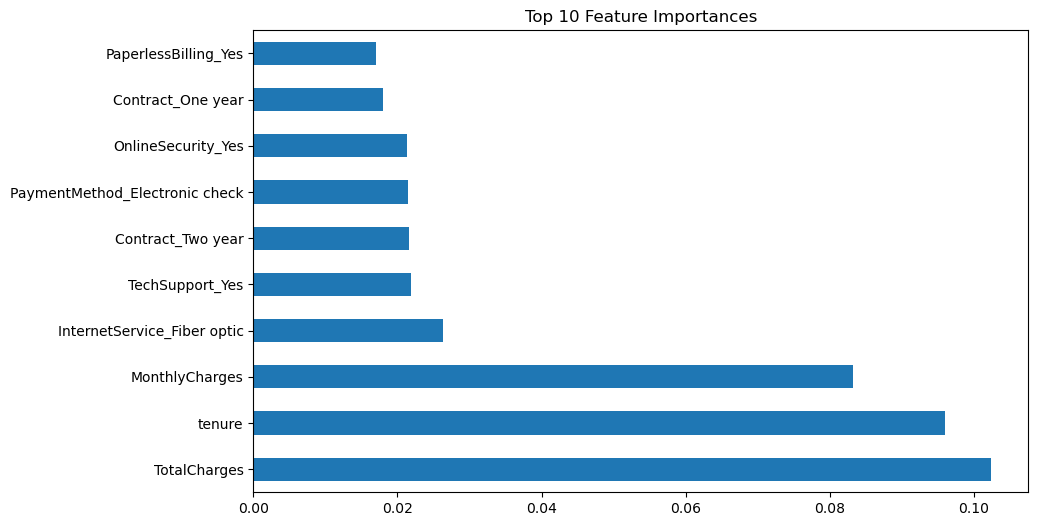

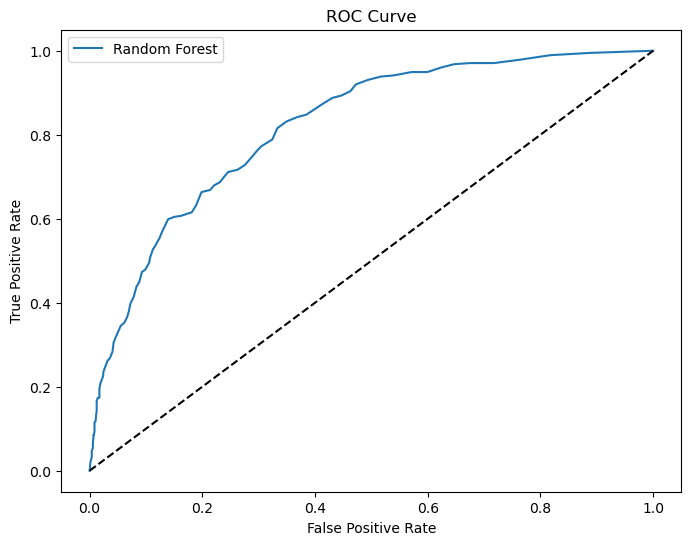

AUC Score: 0.8196921380538487


In [721]:
# Feature importance
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 6))
feature_importances.nlargest(10).plot(kind='barh')
plt.title('Top 10 Feature Importances')
plt.show()
# ROC Curve
y_pred_proba = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.show()
# AUC Score
print("AUC Score:", roc_auc_score(y_test, y_pred_proba))

In [10]:
#pip install lifelines

In [2]:
#Survival Analysis

In [12]:
 telco_data = pd.read_csv('data\\WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [8]:
#Libries used
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt
from lifelines import CoxPHFitter

In [14]:
#Step 1: Data Loading and Exploration

In [18]:
# Load the dataset
#telco_data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
# Display the first few rows of the dataset
print(telco_data.head())
# Check for missing values
print(telco_data.isnull().sum())
# Display basic statistics
print(telco_data.describe())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [20]:
#Step 2: Data Cleaning


In [22]:
# Drop rows with missing values
telco_data = telco_data.dropna()
# Convert 'TotalCharges' to numeric
telco_data['TotalCharges'] = pd.to_numeric(telco_data['TotalCharges'], errors='coerce')
# Encode categorical variables
label_encoders = {}
for column in telco_data.select_dtypes(include=['object']).columns:
 le = LabelEncoder()
 telco_data[column] = le.fit_transform(telco_data[column])
 label_encoders[column] = le

In [24]:
#Step 3: Survival Analysis

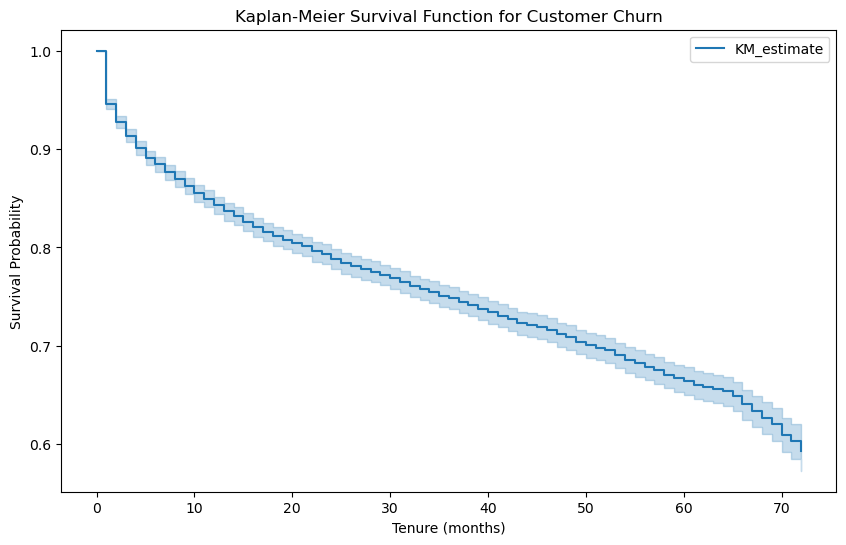

In [26]:
# Define duration and event
duration = telco_data['tenure']
event_observed = telco_data['Churn']
# Fit the Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(duration, event_observed)
# Plot the survival function
plt.figure(figsize=(10, 6))
kmf.plot_survival_function()
plt.title('Kaplan-Meier Survival Function for Customer Churn')
plt.xlabel('Tenure (months)')
plt.ylabel('Survival Probability')
plt.show()


In [28]:
#Step 4: Cox Proportional-Hazards Model


In [42]:
telco_data.isnull().sum().sum()


0

In [40]:
telco_data = telco_data.dropna(how='any',axis=0) 

<lifelines.CoxPHFitter: fitted with 7032 total observations, 5163 right-censored observations>
             duration col = 'tenure'
                event col = 'Churn'
      baseline estimation = breslow
   number of observations = 7032
number of events observed = 1869
   partial log-likelihood = -13301.02
         time fit was run = 2024-08-26 07:37:20 UTC

---
                coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                       
MonthlyCharges  0.06      1.07      0.00            0.06            0.07                1.06                1.07
TotalCharges   -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
gender         -0.02      0.98      0.05           -0.11            0.07                0.89                1.07
SeniorCitizen   0.26      1.30      0.06            0.15            0.37                1.16                1.45
Partner        -0.26      0.77      0.05           -0.37           -0.15                0.69                0.86
Dependents     -0.32      0.73      0.07           -0.46           -0.18                0.63                0.83

                cmp to      z      p  -log2(p)
covariate                                     
MonthlyCharges    0.00  44.23 <0.005       inf
TotalCharges      0.00 -46.54 <0.005       inf
gender            0.00  -0.48   0.63      0.66
SeniorCitizen     0.00   4.66 <0.005     18.28
Partner           0.00  -4.70 <0.005     18.52
Dependents        0.00  -4.60 <0.005     17.88
---
Concordance = 0.91
Partial AIC = 26614.05
log-likelihood ratio test = 4704.03 on 6 df
-log2(p) of ll-ratio test = inf

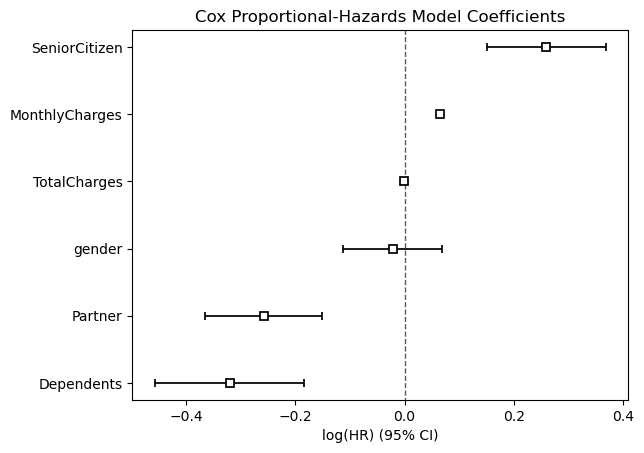

In [44]:
# Select relevant features for the Cox model
features = ['tenure', 'MonthlyCharges', 'TotalCharges', 'gender', 'SeniorCitizen', 'Partner', 'Dependents']
cox_data = telco_data[features + ['Churn']]
# Fit the Cox proportional-hazards model
cph = CoxPHFitter()
cph.fit(cox_data, duration_col='tenure', event_col='Churn')
# Print the summary of the model
cph.print_summary()
# Plot the coefficients
cph.plot()
plt.title('Cox Proportional-Hazards Model Coefficients')
plt.show()


In [217]:
#churn prediction using machine learning


In [218]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [219]:
df = pd.read_csv("data\\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
2674  1855-CFULU  Female              1      No         No       4   
6590  1031-IIDEO  Female              0      No         No       1   
5459  2657-VPXTA  Female              0     Yes        Yes      10   
5141  0303-WMMRN    Male              0      No         No       5   
1612  3092-IGHWF    Male              0     Yes        Yes      67   

     PhoneService MultipleLines InternetService       OnlineSecurity  ...  \
2674          Yes            No              No  No internet service  ...   
6590          Yes            No     Fiber optic                   No  ...   
5459          Yes            No     Fiber optic                   No  ...   
5141          Yes            No              No  No internet service  ...   
1612          Yes           Yes     Fiber optic                   No  ...   

         DeviceProtection          TechSupport          StreamingTV  \
2674  No internet service  No internet service  No internet service   
6590                   No                   No                   No   
5459                   No                   No                  Yes   
5141  No internet service  No internet service  No internet service   
1612                  Yes                   No                   No   

          StreamingMovies        Contract PaperlessBilling     PaymentMethod  \
2674  No internet service  Month-to-month               No      Mailed check   
6590                   No  Month-to-month              Yes  Electronic check   
5459                  Yes  Month-to-month              Yes  Electronic check   
5141  No internet service  Month-to-month              Yes      Mailed check   
1612                   No        One year               No  Electronic check   

     MonthlyCharges  TotalCharges Churn  
2674          20.05         91.45    No  
6590          70.85         70.85   Yes  
5459          88.85        929.45    No  
5141          19.25         86.05    No  
1612          87.40        5918.8   Yes  

[5 rows x 21 columns]

In [220]:
df.drop('customerID',axis='columns',inplace=True)
df

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0     Female              0     Yes         No       1           No   
1       Male              0      No         No      34          Yes   
2       Male              0      No         No       2          Yes   
3       Male              0      No         No      45           No   
4     Female              0      No         No       2          Yes   
...      ...            ...     ...        ...     ...          ...   
7038    Male              0     Yes        Yes      24          Yes   
7039  Female              0     Yes        Yes      72          Yes   
7040  Female              0     Yes        Yes      11           No   
7041    Male              1     Yes         No       4          Yes   
7042    Male              0      No         No      66          Yes   

         MultipleLines InternetService OnlineSecurity OnlineBackup  \
0     No phone service             DSL             No          Yes   
1                   No             DSL            Yes           No   
2                   No             DSL            Yes          Yes   
3     No phone service             DSL            Yes           No   
4                   No     Fiber optic             No           No   
...                ...             ...            ...          ...   
7038               Yes             DSL            Yes           No   
7039               Yes     Fiber optic             No          Yes   
7040  No phone service             DSL            Yes           No   
7041               Yes     Fiber optic             No           No   
7042                No     Fiber optic            Yes           No   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0                 Yes           Electronic check           29.85        29.85   
1                  No               Mailed check           56.95       1889.5   
2                 Yes               Mailed check           53.85       108.15   
3                  No  Bank transfer (automatic)           42.30      1840.75   
4                 Yes           Electronic check           70.70       151.65   
...               ...                        ...             ...          ...   
7038              Yes               Mailed check           84.80       1990.5   
7039              Yes    Credit card (automatic)          103.20       7362.9   
7040              Yes           Electronic check           29.60       346.45   
7041              Yes               Mailed check           74.40        306.6   
7042              Yes  Bank transfer (automatic)          105.65       6844.5   

     Churn  
0       No  
1       No  
2      Yes  
3       No  
4      Yes  
...    ...  
7038    No  
7039    No  
7040    No  
7041   Yes  
7042    No  

[7043 rows x 20 columns]

In [221]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [222]:
df.TotalCharges.values   #as it is string type we should convert it to numeric type.

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [223]:
pd.to_numeric(df.TotalCharges)

ValueError: Unable to parse string " " at position 488

In [224]:
df[pd.to_numeric(df.TotalCharges,errors='coerce').isnull()]

gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
488   Female              0     Yes        Yes       0           No   
753     Male              0      No        Yes       0          Yes   
936   Female              0     Yes        Yes       0          Yes   
1082    Male              0     Yes        Yes       0          Yes   
1340  Female              0     Yes        Yes       0           No   
3331    Male              0     Yes        Yes       0          Yes   
3826    Male              0     Yes        Yes       0          Yes   
4380  Female              0     Yes        Yes       0          Yes   
5218    Male              0     Yes        Yes       0          Yes   
6670  Female              0     Yes        Yes       0          Yes   
6754    Male              0      No        Yes       0          Yes   

         MultipleLines InternetService       OnlineSecurity  \
488   No phone service             DSL                  Yes   
753                 No              No  No internet service   
936                 No             DSL                  Yes   
1082               Yes              No  No internet service   
1340  No phone service             DSL                  Yes   
3331                No              No  No internet service   
3826               Yes              No  No internet service   
4380                No              No  No internet service   
5218                No              No  No internet service   
6670               Yes             DSL                   No   
6754               Yes             DSL                  Yes   

             OnlineBackup     DeviceProtection          TechSupport  \
488                    No                  Yes                  Yes   
753   No internet service  No internet service  No internet service   
936                   Yes                  Yes                   No   
1082  No internet service  No internet service  No internet service   
1340                  Yes                  Yes                  Yes   
3331  No internet service  No internet service  No internet service   
3826  No internet service  No internet service  No internet service   
4380  No internet service  No internet service  No internet service   
5218  No internet service  No internet service  No internet service   
6670                  Yes                  Yes                  Yes   
6754                  Yes                   No                  Yes   

              StreamingTV      StreamingMovies  Contract PaperlessBilling  \
488                   Yes                   No  Two year              Yes   
753   No internet service  No internet service  Two year               No   
936                   Yes                  Yes  Two year               No   
1082  No internet service  No internet service  Two year               No   
1340                  Yes                   No  Two year               No   
3331  No internet service  No internet service  Two year               No   
3826  No internet service  No internet service  Two year               No   
4380  No internet service  No internet service  Two year               No   
5218  No internet service  No internet service  One year              Yes   
6670                  Yes                   No  Two year               No   
6754                   No                   No  Two year              Yes   

                  PaymentMethod  MonthlyCharges TotalCharges Churn  
488   Bank transfer (automatic)           52.55                 No  
753                Mailed check           20.25                 No  
936                Mailed check           80.85                 No  
1082               Mailed check           25.75                 No  
1340    Credit card (automatic)           56.05                 No  
3331               Mailed check           19.85                 No  
3826               Mailed check           25.35                 No  
4380               Mailed check           20.00                 No

In [225]:
df.shape

(7043, 20)

In [226]:
df[df.TotalCharges!=' '].shape

(7032, 20)

In [227]:
df1 = df[df.TotalCharges!=' ']
df1.shape

(7032, 20)

In [228]:
df1.TotalCharges = pd.to_numeric(df1.TotalCharges)

C:\Users\ashis\AppData\Local\Temp\ipykernel_17892\973151263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.TotalCharges = pd.to_numeric(df1.TotalCharges)


In [229]:
df1.TotalCharges.values

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [230]:
df1.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

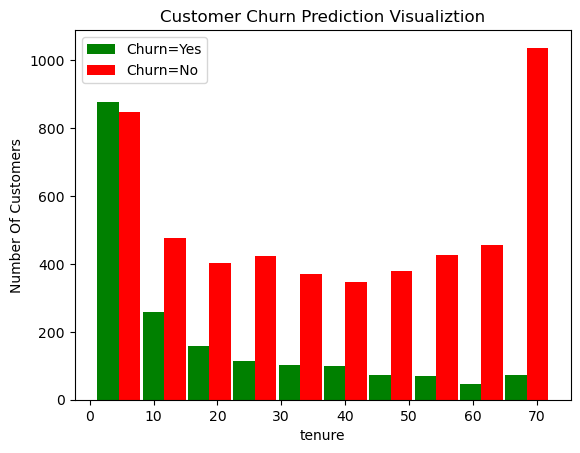

In [231]:
tenure_churn_no = df1[df1.Churn=='No'].tenure
tenure_churn_yes = df1[df1.Churn=='Yes'].tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend();

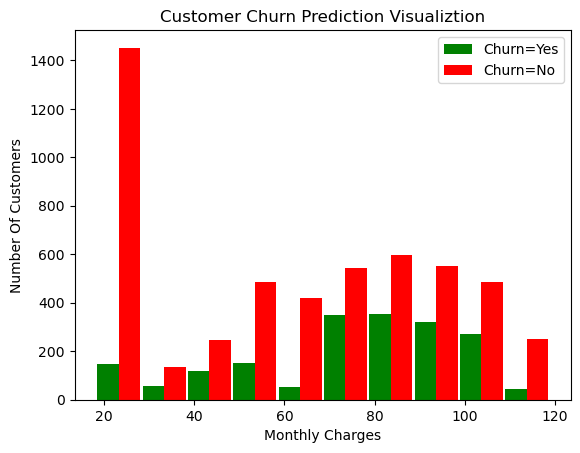

In [232]:
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges      
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges      

plt.xlabel("Monthly Charges")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend();

In [233]:
def print_unique_col_values(df):
       for column in df:
            if df[column].dtypes=='object':
                print(f'{column}: {df[column].unique()}') 

In [234]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [235]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

C:\Users\ashis\AppData\Local\Temp\ipykernel_17892\2045096646.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No internet service','No',inplace=True)
C:\Users\ashis\AppData\Local\Temp\ipykernel_17892\2045096646.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.replace('No phone service','No',inplace=True)


In [236]:
print_unique_col_values(df1)

gender: ['Female' 'Male']
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
PhoneService: ['No' 'Yes']
MultipleLines: ['No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes']
OnlineBackup: ['Yes' 'No']
DeviceProtection: ['No' 'Yes']
TechSupport: ['No' 'Yes']
StreamingTV: ['No' 'Yes']
StreamingMovies: ['No' 'Yes']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn: ['No' 'Yes']


In [237]:
# as there are only 2 different values there is no need of OneHot encoding!
yes_no_columns = ['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup',
                  'DeviceProtection','TechSupport','StreamingTV','StreamingMovies','PaperlessBilling','Churn']
for col in yes_no_columns:
    df1[col].replace({'Yes': 1,'No': 0},inplace=True)

C:\Users\ashis\AppData\Local\Temp\ipykernel_17892\75064592.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1[col].replace({'Yes': 1,'No': 0},inplace=True)
C:\Users\ashis\AppData\Local\Temp\ipykernel_17892\75064592.py:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1[col].replace({'Yes': 1,'

In [238]:
for col in df1:
    print(f'{col}: {df1[col].unique()}') 

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [239]:
# assining 1 for female and 0 for male.
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

C:\Users\ashis\AppData\Local\Temp\ipykernel_17892\3299807316.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df1['gender'].replace({'Female':1,'Male':0},inplace=True)
C:\Users\ashis\AppData\Local\Temp\ipykernel_17892\3299807316.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1['gender'].re

In [240]:
df1.gender.unique()

array([1, 0], dtype=int64)

In [241]:
df2 = pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns


Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [242]:
df2.head(5)

gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
0       1              0        1           0       1             0   
1       0              0        0           0      34             1   
2       0              0        0           0       2             1   
3       0              0        0           0      45             0   
4       1              0        0           0       2             1   

   MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
0              0               0             1                 0  ...   
1              0               1             0                 1  ...   
2              0               1             1                 0  ...   
3              0               1             0                 1  ...   
4              0               0             0                 0  ...   

   InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
0                 True                        False               False   
1                 True                        False               False   
2                 True                        False               False   
3                 True                        False               False   
4                False                         True               False   

   Contract_Month-to-month  Contract_One year  Contract_Two year  \
0                     True              False              False   
1                    False               True              False   
2                     True              False              False   
3                    False               True              False   
4                     True              False              False   

   PaymentMethod_Bank transfer (automatic)  \
0                                    False   
1                                    False   
2                                    False   
3                                     True   
4                                    False   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                  False                            True   
1                                  False                           False   
2                                  False                           False   
3                                  False                           False   
4                                  False                            True   

   PaymentMethod_Mailed check  
0                       False  
1                        True  
2                        True  
3                       False  
4                       False  

[5 rows x 27 columns]

In [243]:
df2.shape

(7032, 27)

In [244]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                           bool
InternetService_Fiber optic                   bool
InternetService_No             

In [245]:
cols_to_scale = ['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [246]:
for col in df2:
    print(f'{col}: {df2[col].unique()}')

gender: [1 0]
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService: [0 1]
MultipleLines: [0 1]
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [

In [247]:
#create x feature
X = df2.drop('Churn',axis='columns')
#create Y feature
y = df2['Churn']

#Data splitting 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [248]:
X_train.shape

(5625, 26)

In [249]:
y_train.shape

(5625,)

In [250]:
X_train[:10]

gender  SeniorCitizen  Partner  Dependents    tenure  PhoneService  \
5664       1              1        0           0  0.126761             1   
101        1              0        1           1  0.000000             1   
2621       0              0        1           0  0.985915             1   
392        1              1        0           0  0.014085             1   
1327       0              0        1           0  0.816901             1   
3607       1              0        0           0  0.169014             1   
2773       0              0        1           0  0.323944             0   
1936       1              0        1           0  0.704225             1   
5387       0              0        0           0  0.042254             0   
4331       0              0        0           0  0.985915             1   

      MultipleLines  OnlineSecurity  OnlineBackup  DeviceProtection  ...  \
5664              0               0             0                 1  ...   
101               0               0             0                 0  ...   
2621              0               0             1                 1  ...   
392               0               0             0                 0  ...   
1327              1               0             0                 1  ...   
3607              0               1             0                 0  ...   
2773              0               0             0                 1  ...   
1936              0               1             1                 0  ...   
5387              0               0             0                 0  ...   
4331              1               0             0                 0  ...   

      InternetService_DSL  InternetService_Fiber optic  InternetService_No  \
5664                False                         True               False   
101                 False                        False                True   
2621                 True                        False               False   
392                  True                        False               False   
1327                False                         True               False   
3607                 True                        False               False   
2773                 True                        False               False   
1936                 True                        False               False   
5387                 True                        False               False   
4331                False                        False                True   

      Contract_Month-to-month  Contract_One year  Contract_Two year  \
5664                     True              False              False   
101                      True              False              False   
2621                    False              False               True   
392                      True              False              False   
1327                    False               True              False   
3607                    False               True              False   
2773                     True              False              False   
1936                    False               True              False   
5387                     True              False              False   
4331                    False              False               True   

      PaymentMethod_Bank transfer (automatic)  \
5664                                    False   
101                                     False   
2621                                    False   
392                                     False   
1327                                     True   
3607                                    False   
2773                                    False   
1936                                     True   
5387                                    False   
4331                                     True   

      PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
5664                                   True                           Fa

In [251]:
#import tenserflow
import tensorflow as tf
from tensorflow import keras

#Building model
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

#Compiling a model.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#traning model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step - accuracy: 0.7408 - loss: 0.5303
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7986 - loss: 0.4227
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.8008 - loss: 0.4179
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8001 - loss: 0.4140
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 849us/step - accuracy: 0.8056 - loss: 0.4130
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 804us/step - accuracy: 0.8004 - loss: 0.4085
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 790us/step - accuracy: 0.8048 - loss: 0.4177
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 780us/step - accuracy: 0.8049 - loss: 0.4095
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.8024 - loss: 0.4118
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 876us/step - accuracy: 0.8076 - loss: 0.4043
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step - accuracy: 0.8070 - loss: 0.4044
Epoch 12/100
176/176 ━━━━━━━━━━

In [252]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7989 - loss: 0.4398  


[0.45475590229034424, 0.7896233201026917]

In [253]:
yp = model.predict(X_test)
yp[:5]

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


array([[0.19503334],
       [0.45130935],
       [0.01367474],
       [0.720104  ],
       [0.4668799 ]], dtype=float32)

In [254]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [255]:
y_pred[:10]

[0, 0, 0, 1, 0, 1, 0, 0, 0, 0]

In [256]:
y_test[:10]

2660    0
744     0
5579    1
64      1
3287    1
816     1
2670    0
5920    0
1023    0
6087    0
Name: Churn, dtype: int64

In [257]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       999
           1       0.67      0.55      0.60       408

    accuracy                           0.79      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.78      0.79      0.78      1407



Text(95.72222222222221, 0.5, 'Truth')

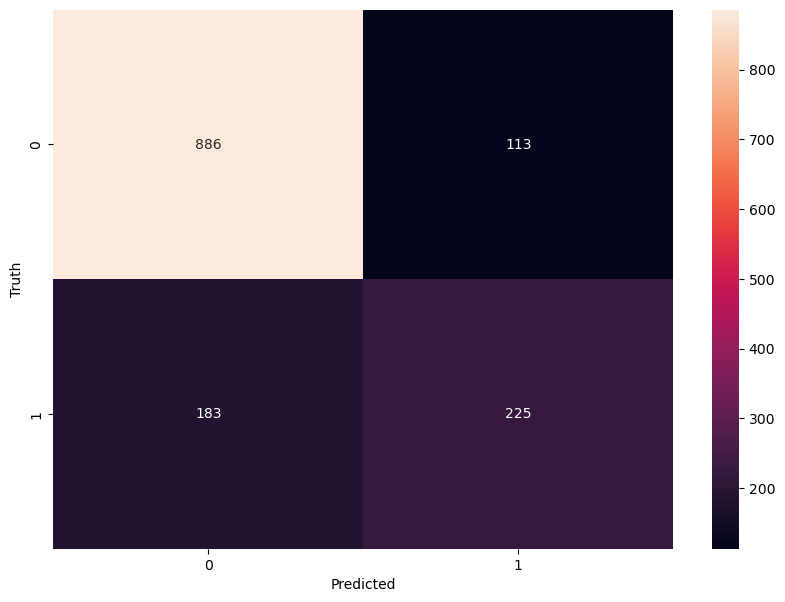

In [258]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [259]:
#import tenserflow
import tensorflow as tf
from tensorflow import keras

#Building model we have increases the hidden layers.
model = keras.Sequential([
    keras.layers.Dense(26, input_shape=(26,), activation='relu'),    # INPUT LAYER
    keras.layers.Dense(15, activation='relu'),                       # HIDDEN LAYER
    keras.layers.Dense(10, activation='relu'),                       # HIDDEN LAYER
    keras.layers.Dense(5, activation='relu'),                        # HIDDEN LAYER
    keras.layers.Dense(1, activation='sigmoid')                      # OUTPUT LAYER
])

#Compiling a model.
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

#traning model
model.fit(X_train, y_train, epochs=100)

Epoch 1/100


C:\Users\ashis\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


176/176 ━━━━━━━━━━━━━━━━━━━━ 1s 995us/step - accuracy: 0.5704 - loss: 0.6500
Epoch 2/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 831us/step - accuracy: 0.7901 - loss: 0.4351
Epoch 3/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 710us/step - accuracy: 0.7861 - loss: 0.4401
Epoch 4/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 931us/step - accuracy: 0.8048 - loss: 0.4100
Epoch 5/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.8145 - loss: 0.4032
Epoch 6/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 830us/step - accuracy: 0.8035 - loss: 0.4109
Epoch 7/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 999us/step - accuracy: 0.7984 - loss: 0.4087
Epoch 8/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step - accuracy: 0.8169 - loss: 0.3994
Epoch 9/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8123 - loss: 0.4018
Epoch 10/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.8083 - loss: 0.4027
Epoch 11/100
176/176 ━━━━━━━━━━━━━━━━━━━━ 0s 945us/step - accuracy: 0.8040 - loss: 0.4048
Epoch 12/100
176/176 ━━━━━━━━━━━━

In [260]:
model.evaluate(X_test, y_test)

44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7722 - loss: 0.5284


[0.5553882122039795, 0.7640369534492493]

In [264]:
#Accuracy

In [261]:
round((860+208)/(862+208+139+200),2)

0.76

In [265]:
#Precision for 0 class. i.e. Precision for customers who did not churn

In [262]:
round(860/(860+200),2)

0.81

In [266]:
#Precision for 1 class. i.e. Precision for customers who actually churned

In [267]:
round(208/(208+139),2)

0.6